In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from env import user, host, password, get_db_url

import warnings
warnings.filterwarnings("ignore")

# Acquire

In [2]:
query = """
SELECT m.*, s.species_name
FROM measurements AS m
JOIN species AS s ON m.species_id = s.species_id;"""

url = get_db_url("iris_db")

In [3]:
iris = pd.read_sql(query, url)
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa


In [4]:
iris.drop(columns="measurement_id", inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


## 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

1. Choose features other than the ones used in the lesson.
2. Visualize the results of your clustering.
3. Use the elbow method to visually select a good value for k.
4. Repeat the clustering, this time with 3 different features.

In [5]:
X = iris[["sepal_width", "petal_width"]]

In [6]:
# make object
kmeans = KMeans(n_clusters=3)
# fit object
kmeans.fit(X)
# use object
kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [7]:
iris["clusters"] = kmeans.predict(X)

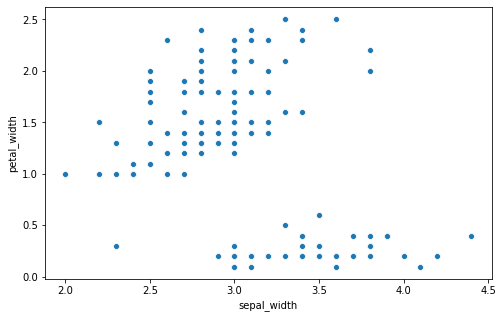

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="sepal_width", y="petal_width", data=iris)
plt.show()

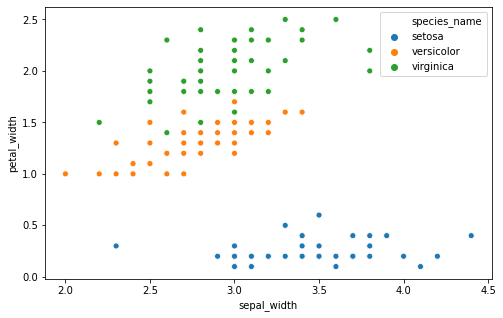

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="sepal_width", y="petal_width", data=iris, hue="species_name")
plt.show()

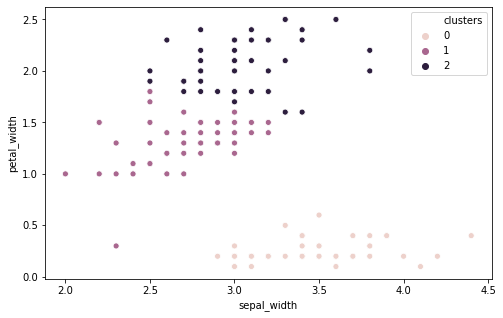

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="sepal_width", y="petal_width", data=iris, hue="clusters")
plt.show()

In [11]:
iris.clusters = "cluster " + iris.clusters.astype(str)

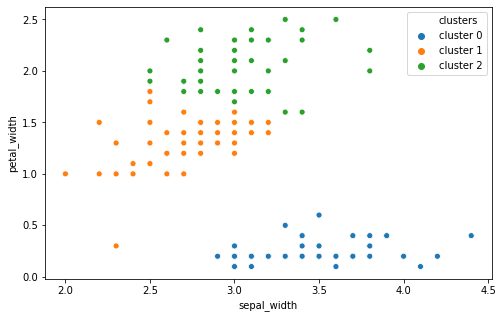

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="sepal_width", y="petal_width", data=iris, hue="clusters")
plt.show()

In [13]:
centriods = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centriods

,sepal_width,petal_width
0,3.451020,0.244898
1,2.707547,1.309434
2,3.041667,2.052083


In [14]:
iris.groupby("clusters")["sepal_width", "petal_width"].mean()

,sepal_width,petal_width
clusters,,
cluster 0,3.451020,0.244898
cluster 1,2.707547,1.309434
cluster 2,3.041667,2.052083


> Centriods are **not** data points from the dataset! Instead, they are the calculated average values for each group.

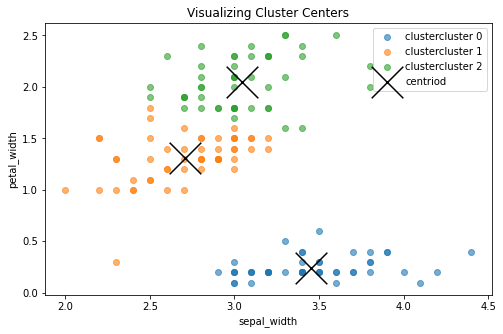

In [15]:
plt.figure(figsize=(8, 5))

for cluster, subset in iris.groupby("clusters"):
    plt.scatter(subset.sepal_width, subset.petal_width, label="cluster" + str(cluster), alpha=.6)
    
centriods.plot.scatter(x="sepal_width", y="petal_width", c="black", marker="x", s=1000, ax=plt.gca(), label="centriod")

plt.legend()
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.title("Visualizing Cluster Centers")
plt.show()


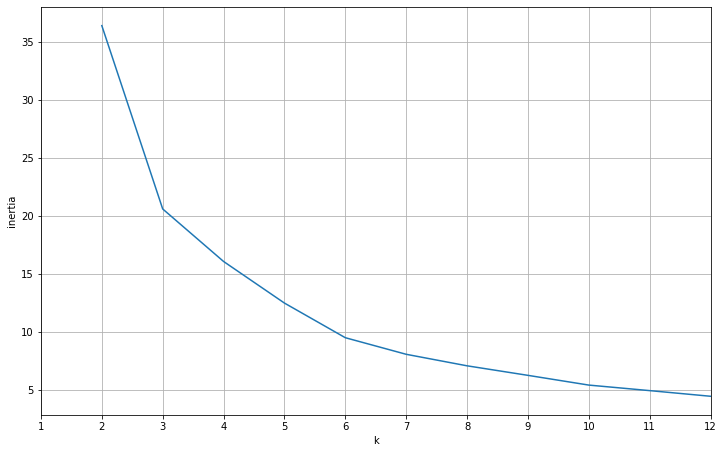

In [16]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(12, 7.5))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel("k")
plt.ylabel("inertia")
plt.xticks(range(1, 13))
plt.grid()

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [17]:
query = """
SELECT *
FROM customers;"""

url = get_db_url("mall_customers")

In [18]:
mall = pd.read_sql(query, url)
print(mall.shape)
mall.head()

(200, 5)


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
X = mall[["age", "spending_score"]]

In [20]:
# make object
kmeans = KMeans(n_clusters=4)
# fit object
kmeans.fit(X)
# use object
kmeans.predict(X)

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [21]:
mall["cluster"] = kmeans.predict(X)
mall.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


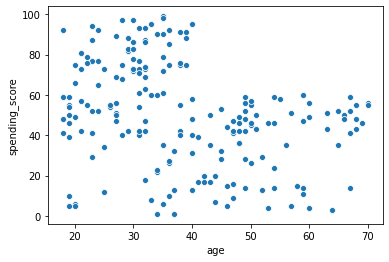

In [22]:
sns.scatterplot(x="age", y="spending_score", data=mall)

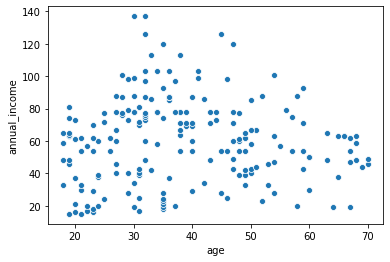

In [23]:
sns.scatterplot(x="age", y="annual_income", data=mall)

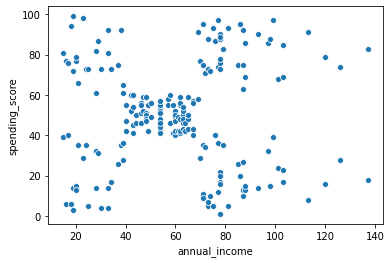

In [24]:
sns.scatterplot(x="annual_income", y="spending_score", data=mall)

In [25]:
mall_centriods = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
mall_centriods

,age,spending_score
0,55.708333,48.229167
1,30.175439,82.350877
2,43.291667,15.020833
3,27.617021,49.148936


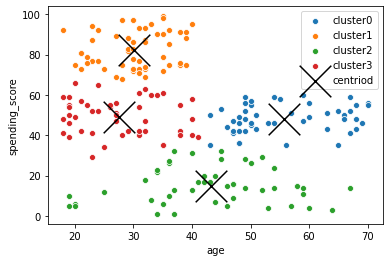

In [26]:
for cluster, subset in mall.groupby("cluster"):
    sns.scatterplot(x=subset.age, y=subset.spending_score, data=mall, label="cluster" + str(cluster))
    
mall_centriods.plot.scatter(x="age", y="spending_score", c="black", marker="x", s=1000, ax=plt.gca(), label="centriod")

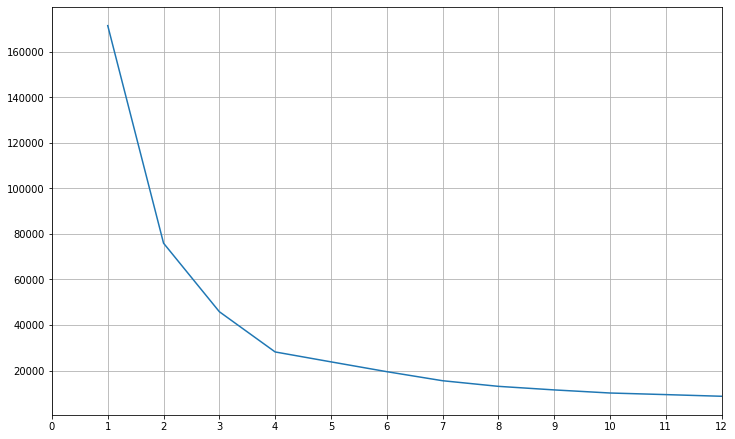

In [27]:
plt.figure(figsize=(12, 7.5))
pd.Series({k: get_inertia(k) for k in range(1, 13)}).plot()
plt.xticks(range(0, 13))
plt.grid()

In [28]:
scaler = MinMaxScaler()
scaler.fit(X)
mall[["age", "spending_score"]] = scaler.transform(X)
mall.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,0.019231,15,0.387755,3
1,2,Male,0.057692,15,0.816327,1
2,3,Female,0.038462,16,0.051020,2
3,4,Female,0.096154,16,0.775510,1
4,5,Female,0.250000,17,0.397959,3


In [29]:
# make object
kmeans = KMeans(n_clusters=4)
# fit object
kmeans.fit(X)
# use object
mall["scaled_clusters"] = kmeans.predict(X)
mall.head()

,customer_id,gender,age,annual_income,spending_score,cluster,scaled_clusters
0,1,Male,0.019231,15,0.387755,3,3
1,2,Male,0.057692,15,0.816327,1,1
2,3,Female,0.038462,16,0.051020,2,2
3,4,Female,0.096154,16,0.775510,1,1
4,5,Female,0.250000,17,0.397959,3,3


In [30]:
scaled_centriods = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
scaled_centriods

,age,spending_score
0,55.708333,48.229167
1,30.175439,82.350877
2,43.291667,15.020833
3,27.617021,49.148936


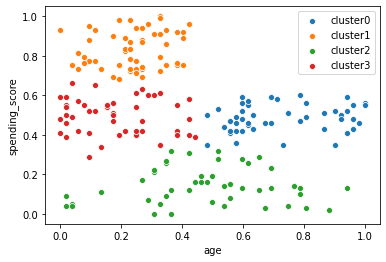

In [31]:
for cluster, subset in mall.groupby("scaled_clusters"):
    sns.scatterplot(x=subset.age, y=subset.spending_score, data=mall, label="cluster" + str(cluster))
    
# scaled_centriods.plot.scatter(x="age", y="spending_score", c="black", marker="x", s=1000, ax=plt.gca(), label="centriod")